### Boston Housing Prices 
##### by Neha Narang

#### Problem Statement :  To predict 'Price' based on other dependent variable.

Attribute Information (in order)

       - CRIM per capita crime rate by town

       - ZN proportion of residential land zoned for lots over 25,000 sq.ft.

       - INDUS proportion of non-retail business acres per town

       - CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

       - NOX nitric oxides concentration (parts per 10 million)

       - RM average number of rooms per dwelling

       - AGE proportion of owner-occupied units built prior to 1940

       - DIS weighted distances to five Boston employment centres

       - RAD index of accessibility to radial highways

        - TAX full-value property-tax rate per $10,000

        - PTRATIO pupil-teacher ratio by town

        - B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

        - LSTAT % lower status of the population

        - MEDV Median value of owner-occupied homes in $1000’s (Price - this is target column)



In [485]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import seaborn as sns


In [486]:
boston,target = load_boston(return_X_y=True) # target contains Y data 
bos = pd.DataFrame(boston,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
tar = pd.DataFrame(target,columns=['PRICES'])

In [487]:
dataFrame = pd.concat([bos,tar],axis=1)  
dataFrame.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [488]:
dataFrame.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [489]:
dataFrame.shape

(506, 14)

In [490]:
dataFrame.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICES     0
dtype: int64

<AxesSubplot:xlabel='LSTAT', ylabel='PRICES'>

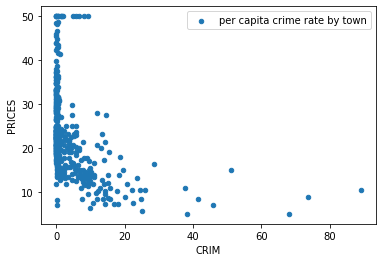

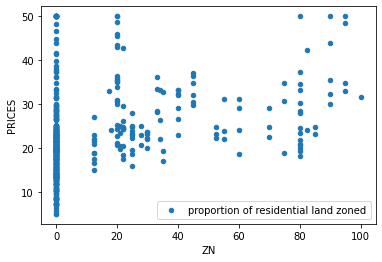

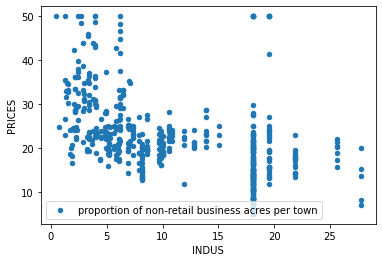

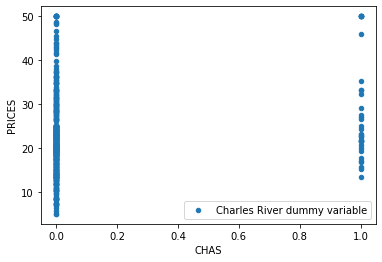

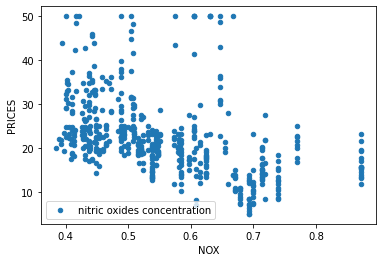

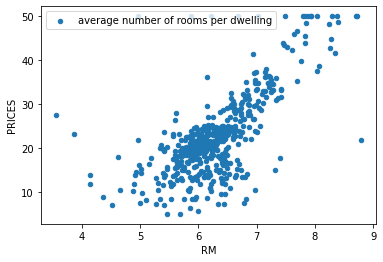

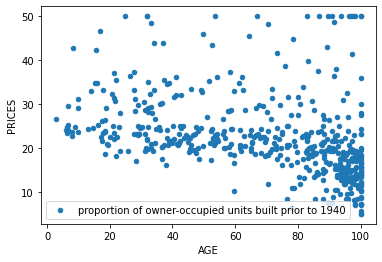

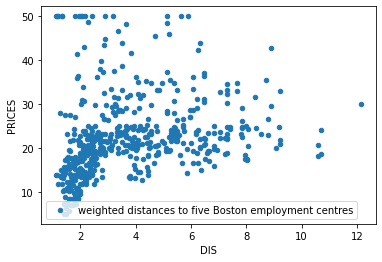

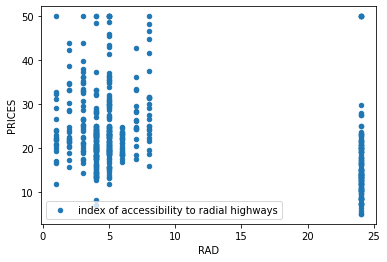

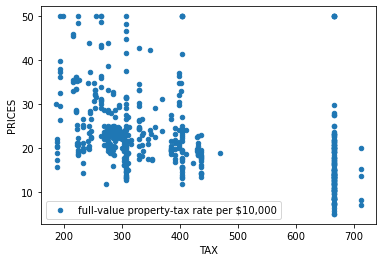

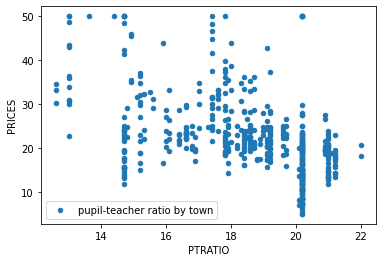

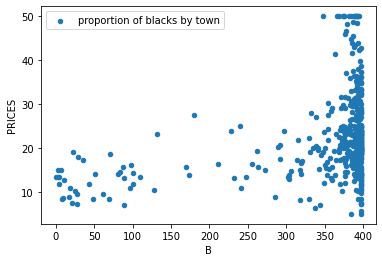

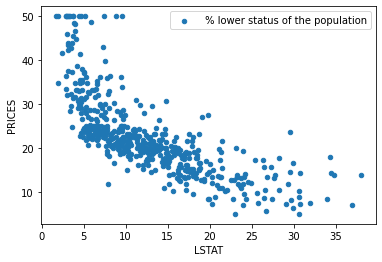

In [491]:
# visualization of features and label 

dataFrame.plot(kind='scatter',x='CRIM',y='PRICES',label = 'per capita crime rate by town',fig=[28,10])
dataFrame.plot(kind='scatter',x='ZN',y='PRICES',label='proportion of residential land zoned')
dataFrame.plot(kind='scatter',x='INDUS',y='PRICES',label='proportion of non-retail business acres per town')
dataFrame.plot(kind='scatter',x='CHAS',y='PRICES',label='Charles River dummy variable')
dataFrame.plot(kind='scatter',x='NOX',y='PRICES',label='nitric oxides concentration')
dataFrame.plot(kind='scatter',x='RM',y='PRICES',label='average number of rooms per dwelling')
dataFrame.plot(kind='scatter',x='AGE',y='PRICES',label ='proportion of owner-occupied units built prior to 1940')
dataFrame.plot(kind='scatter',x='DIS',y='PRICES',label='weighted distances to five Boston employment centres')
dataFrame.plot(kind='scatter',x='RAD',y='PRICES',label='index of accessibility to radial highways')
dataFrame.plot(kind='scatter',x='TAX',y='PRICES',label='full-value property-tax rate per $10,000')
dataFrame.plot(kind='scatter',x='PTRATIO',y='PRICES',label='pupil-teacher ratio by town')
dataFrame.plot(kind='scatter',x='B',y='PRICES',label='proportion of blacks by town')
dataFrame.plot(kind='scatter',x='LSTAT',y='PRICES',label=' % lower status of the population')




#### Observations - 
1) Relation among  crime rate and price is strong. If crime rate is less, prices are from medium to high. Whereas, when prices are low then crime rate is high.
2) In case of concentration of nitric oxide in area, shows medium to high prices when level of nitric oxide is between 0.4 till 0.7
3) positive linearity can be seen in number of rooms vs prices
4) price falls incase of aged property
5) polynomial graph can be seen in distance to employment centers & price of houses. Less distance displays less and average prices.As the distance increases trend shows average price of houses.
6) When radial highway is accessible,houses have average to high prices.
7) More house tax means avg to high cost property
8) If pupil-teacher ratio is very less, then prices are high and if ration is very high , then property has less prices. On the other hand, the price varies from avg to high, if the ratio is between 15 to 19. 



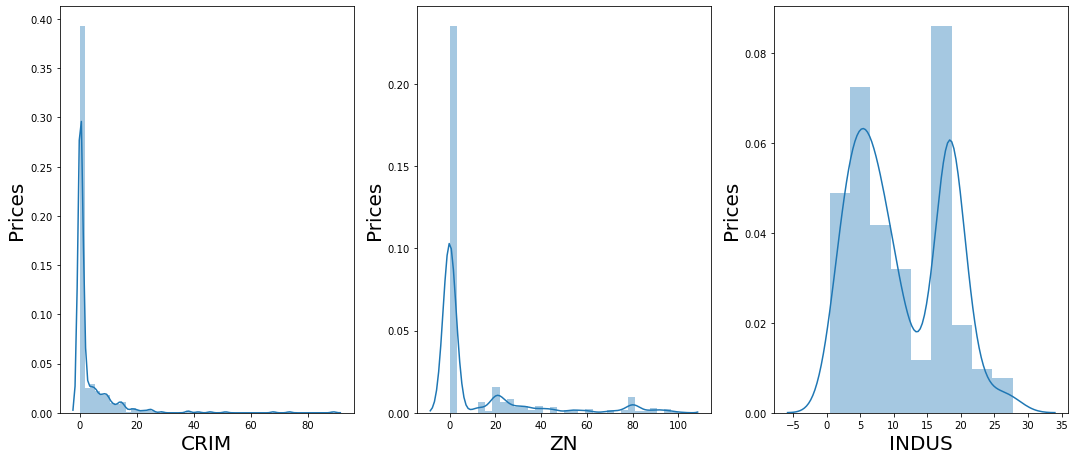

In [492]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dataFrame:
    if plotnumber<=3 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(dataFrame[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Prices',fontsize=20)
    plotnumber+=1
plt.tight_layout()

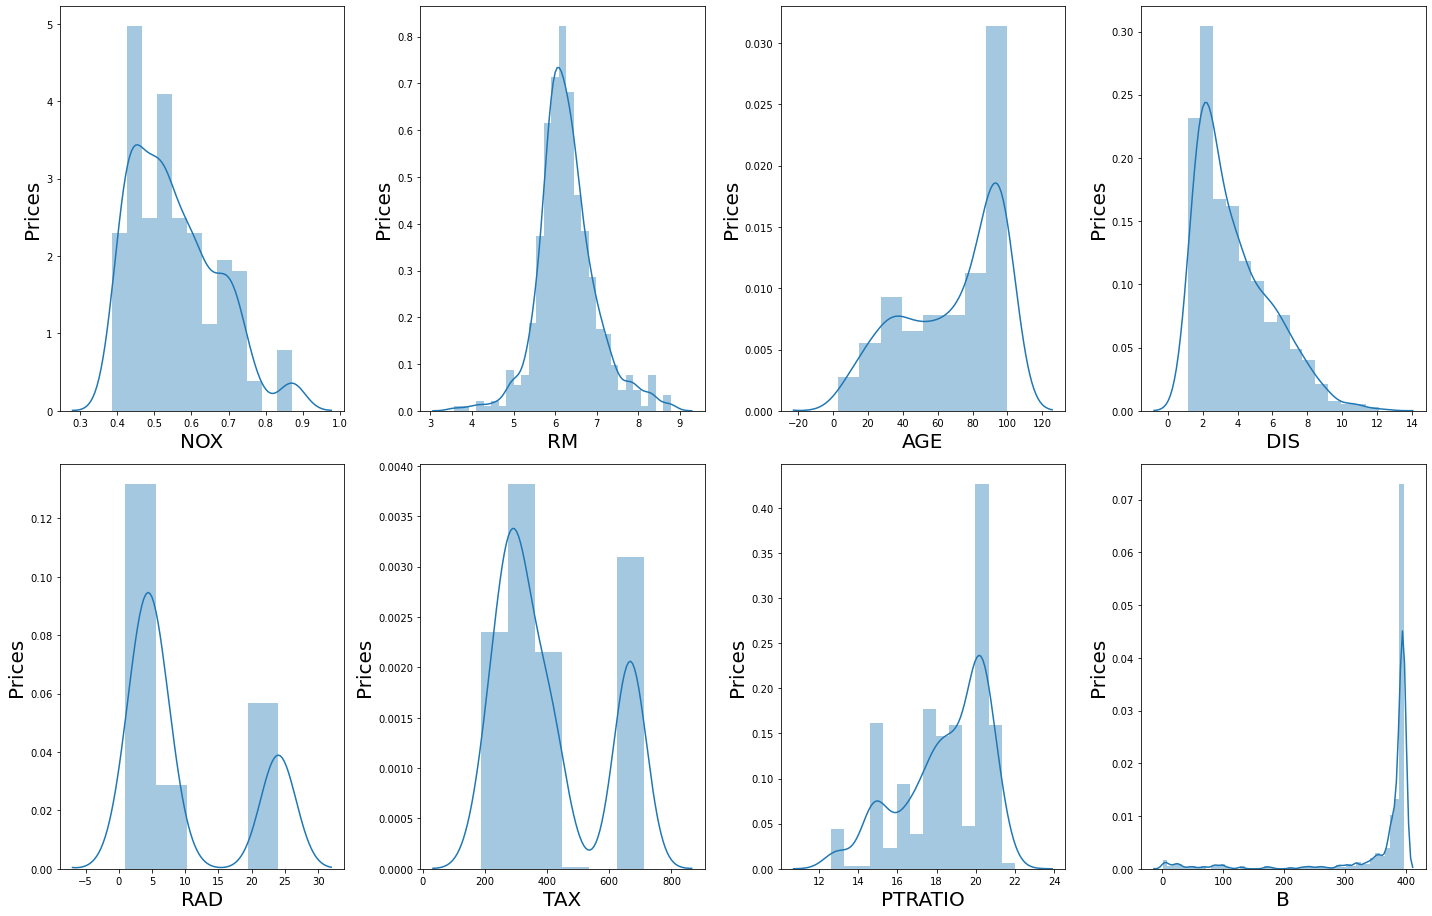

In [493]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dataFrame:
    if plotnumber>=5 and plotnumber<=12 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(dataFrame[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Prices',fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### Observation - 



In [494]:
# assigning features to x and label to y
x= bos
y= tar


In [495]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_scaled=scaler.fit_transform(x)
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [496]:
# checking collinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables =X_scaled
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif["Features"]=x.columns

In [497]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


 a VIF value greater than 5 means a very severe multicollinearity .In this case RAD , TAX have multicollinearity

In [498]:
X = bos.drop(['RAD'],axis=1)
scaler =StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled


array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [499]:
variables =X_scaled
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif["Features"]=X.columns

In [500]:
vif

,VIF,Features
0,1.664471,CRIM
1,2.273018,ZN
2,3.682265,INDUS
3,1.061561,CHAS
4,4.304929,NOX
5,1.885425,RM
6,3.083009,AGE
7,3.954951,DIS
8,3.415289,TAX
9,1.734873,PTRATIO


#### No collinearity exists now

In [501]:
# Feature Selection with the help of p-values
import statsmodels.formula.api as smf
lm=smf.ols(formula='PRICES ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + TAX + PTRATIO + B + LSTAT', data=dataFrame).fit()
lm.conf_int()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PRICES   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     110.8
Date:                Wed, 09 Sep 2020   Prob (F-statistic):          1.92e-131
Time:                        00:46:29   Log-Likelihood:                -1509.5
No. Observations:                 506   AIC:                             3045.
Df Residuals:                     493   BIC:                             3100.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.7594      4.992      5.961      0.000      19.951      39.568
CRIM          -0.0675      0.032     -2.090      0.037      -0.131      -0.004
ZN             0.0397      0.014      2.852      0.005       0.012       0.067
INDUS         -0.0584      0.060     -0.969      0.333      -0.177       0.060
CHAS           3.1144      0.874      3.563      0.000       1.397       4.832
NOX          -15.2618      3.858     -3.956      0.000     -22.842      -7.682
RM             4.1146      0.421      9.772      0.000       3.287       4.942
AGE           -0.0039      0.013     -0.292      0.770      -0.030       0.022
DIS           -1.4902      0.203     -7.323      0.000      -1.890      -1.090
TAX            0.0013      0.002      0.565      0.573      -0.003       0.006
PTRATIO       -0.8387      0.131     -6.398      0.000      -1.096      -0.581
B              0.0084      0.003      3.079      0.002       0.003       0.014
LSTAT         -0.5164      0.052     -9.986      0.000      -0.618      -0.415
==============================================================================
Omnibus:                      189.296   Durbin-Watson:                   1.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              907.772
Skew:                           1.596   Prob(JB):                    7.58e-198
Kurtosis:                       8.733   Cond. No.                     1.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [502]:
from sklearn.linear_model import LinearRegression
feature_cols = ['CRIM' , 'ZN' , 'INDUS' , 'CHAS' , 'NOX' , 'RM' , 'AGE' , 'DIS' , 'TAX' , 'PTRATIO' , 'B' , 'LSTAT']
X = dataFrame[feature_cols]
Y = dataFrame.PRICES
lm=LinearRegression()
lm.fit(X,Y)
print(lm.intercept_)
i=0
for col in feature_cols:
    print('The coefficient of ',col, 'is: ', lm.coef_[i])
    i=i+1

29.759382142654015
The coefficient of  CRIM is:  -0.06754026656201623
The coefficient of  ZN is:  0.03971974889651973
The coefficient of  INDUS is:  -0.05841054376442336
The coefficient of  CHAS is:  3.1143732848537407
The coefficient of  NOX is:  -15.261797983085271
The coefficient of  RM is:  4.114609782418254
The coefficient of  AGE is:  -0.00392675787626206
The coefficient of  DIS is:  -1.4901533799434208
The coefficient of  TAX is:  0.0013341615567875609
The coefficient of  PTRATIO is:  -0.8387355897825318
The coefficient of  B is:  0.008415056735352242
The coefficient of  LSTAT is:  -0.5164179658509969


<AxesSubplot:>

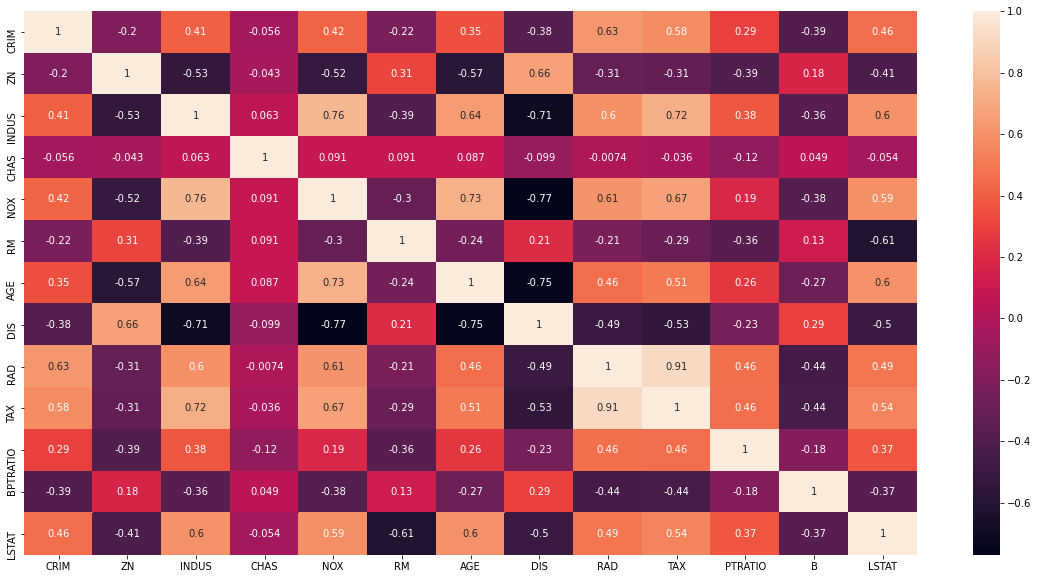

In [503]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(bos.corr(),annot = True)

In [504]:
# Feature Selection with the help of p-values
import statsmodels.formula.api as smf
lm=smf.ols(formula='PRICES ~ CHAS + RM + DIS + PTRATIO + LSTAT', data=dataFrame).fit()
lm.conf_int()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PRICES   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 09 Sep 2020   Prob (F-statistic):          5.72e-127
Time:                        00:46:32   Log-Likelihood:                -1538.5
No. Observations:                 506   AIC:                             3089.
Df Residuals:                     500   BIC:                             3114.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.4669      4.053      5.790      0.000      15.504      31.429
CHAS           2.9225      0.910      3.212      0.001       1.135       4.710
RM             4.1797      0.420      9.948      0.000       3.354       5.005
DIS           -0.4923      0.127     -3.871      0.000      -0.742      -0.242
PTRATIO       -0.9322      0.116     -8.058      0.000      -1.159      -0.705
LSTAT         -0.6585      0.046    -14.198      0.000      -0.750      -0.567
==============================================================================
Omnibus:                      150.602   Durbin-Watson:                   1.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              593.117
Skew:                           1.302   Prob(JB):                    1.61e-129
Kurtosis:                       7.621   Cond. No.                         432.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [505]:
from sklearn.linear_model import LinearRegression
feature_cols = ['CHAS' ,  'RM' , 'DIS' , 'PTRATIO' , 'LSTAT']
X = dataFrame[feature_cols]
Y = dataFrame.PRICES
lm=LinearRegression()
lm.fit(X,Y)
print(lm.intercept_)
i=0
for col in feature_cols:
    print('The coefficient of ',col, 'is: ', lm.coef_[i])
    i=i+1

23.466921697565525
The coefficient of  CHAS is:  2.9224712888288784
The coefficient of  RM is:  4.179656913824883
The coefficient of  DIS is:  -0.49226649577522164
The coefficient of  PTRATIO is:  -0.9322010474845785
The coefficient of  LSTAT is:  -0.6584522569844053


In [506]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.6, random_state = 52)

In [507]:
regression = LinearRegression()

regression.fit(X_train,y_train)

LinearRegression()

In [508]:
regression.score(X_train,y_train)

0.6948923772656651

In [509]:
# function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

adj_r2(X_train,y_train)

0.6871090195428504

In [510]:
regression.score(X_test,y_test)

0.6831407771052598

In [511]:
adj_r2(X_test,y_test)

0.6778243471909184

In [512]:
import  pickle
filename='final_housing_model.pickle'
pickle.dump(regression,open(filename,'wb'))

In [513]:
# saving the model to the local file system
import pickle
filename1 = 'scaler_model.pickle'
pickle.dump(scaler, open(filename1, 'wb'))

In [514]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [515]:
# best alpha parameter
alpha = lasscv.alpha_
alpha # this is value of lambda

0.0007862851056742861

In [516]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.0007862851056742861)

In [517]:
lasso_reg.score(X_test, y_test)

0.6830897203832621

In [518]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([4.47620353e+00, 8.15146508e+00, 2.08347399e+00, 8.26213164e+00,
       1.61185468e+00, 8.43959679e+00, 1.20748357e+00, 2.27376140e+00,
       3.99634940e+00, 1.32407248e+00, 6.82327923e+00, 2.45375923e+00,
       3.43570264e+00, 8.40960297e+00, 3.70707719e+00, 2.98195762e+00,
       4.42369455e-03, 6.52303031e+00, 9.86048969e+00, 6.67625279e+00,
       7.47798926e+00, 1.18759350e+0...
       2.41548644e+00, 6.00633102e+00, 6.22791330e-01, 4.39742177e+00,
       4.34833557e+00, 8.44786483e+00, 2.16974222e+00, 9.24052041e+00,
       4.49728215e+00, 3.65733732e+00, 6.04650062e+00, 9.19391927e+00,
       2.03828593e+00, 8.09262957e+00, 8.89213191e+00, 6.81466979e+00,
       5.11300469e-01, 8.54919324e+00, 5.20973289e+00, 1.90282589e+00,
       1.34604673e+00, 2.89249456e+00]),
        cv=10, normalize=True)

In [519]:
ridgecv.alpha_

0.004423694549026136

In [520]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.004423694549026136)

In [521]:
ridge_model.score(X_test, y_test)

0.6831428393610621

In [522]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(X_train, y_train)

ElasticNetCV(cv=10)

In [523]:
elasticCV.alpha_

0.09158978629546126

In [524]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [525]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=0.09158978629546126)

In [526]:
elasticnet_reg.score(X_test, y_test)

0.6844416413810169

 r2_score for test data = 0.683140
 Lasso = 0.683089
 Ridge = 0.683188
 ElasticNet =0.68444
 
 our r2_score for test data comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.